<a href="https://colab.research.google.com/github/thaizaloiola/feminicidio_SP/blob/main/feminicidio_SP_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feminicídio no estado de SP

**Feminicídio** é o homicídio praticado contra mulheres em decorrência da vítima ser do sexo feminino. Tal brutalidade sempre esteve presente em nossa sociedade, seja por discriminação, misoginia ou qualquer outra motivação que leve alguém a cometer uma fatalidade contra uma mulher simplesmente pelo fato de ela ser mulher. Contudo, a palavra "feminicídio" ganhou ainda mais destaque e repercussão após a inclusão no Código Penal Brasileiro com a aprovação da Lei do Feminicídio, em 2015, quando houve um pico de denúncias registradas de feminicídio ou tentativa de homicídio tendo o gênero como motivo.
Desde então o número de denúncias vem aumentando a cada ano, incluindo aumento
de denúncias contra violência doméstica (física e/ou psicológica), uma vez que são formas de violência que geralmente precedem o feminicídio; porém segundo o SIM (Sistema de Informações sobre Mortalidade) há uma subnotificação alarmante, o que contribui diretamente para o crescimento do número de casos fatais.
Dito isso, é imensurável a importância da abordagem, apoio e enfrentamento da violência contra mulher realizados através dos canais de denúncias. Somente no ano de 2020 o Brasil registrou 105.821 denúncias, o que representa 30% de todas as denúncias feitas através do Disque 100 (Serviço de Proteção Contra Violação dos Direitos Humanos) e ligue 180 (Central de Atendimento à Mulher).
Dado o grau de importância e seriedade de tal assunto, além do crescente aumento de casos registrados na pandemia, gostaria de tratá-lo aqui.


In [1]:
!pip install unidecode --quiet
!pip install geopandas pygeos --quiet

In [2]:
#libs para montar o dataframe
import glob 
import os 
import pandas as pd

#libs para análise descritiva
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt
from plotnine import *
from mizani.formatters import custom_format
%matplotlib inline

#libs para tratamento de str
import unidecode

#lib para análise geo
import geopandas as gpd

#libs para o mapa de kernel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#libs modelagem preditiva
import numpy as np
import pandas as pd
import patsy
import statsmodels.formula.api as smf
from scipy.stats import iqr
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


###No estudo foram pegos os dados da secretaria de segurança pública de São Paulo

Abaixo é possível ver qual foi o código utilizado para pegar os dados do path pessoal de forma a transformá-lo num dataframe, o qual será utilizado ao longo de toda a análise. 

Obs: está comentado de propósito, pois não há necessidade de replicá-lo aqui.


In [3]:
#path = r'C:\Users\thaizals\Documents\python data\todos' ## coloca seu path onde salvou todos 

#all_files = glob.glob(os.path.join(path, "*.xls"))
#df_from_each_file = (pd.read_excel(f) for f in all_files) ## le todos os arquivos de excel
#dfTodosAnos = pd.concat(df_from_each_file, ignore_index=True)  ## concatena todos eles num único dataframe!

#dfTodosAnos.to_excel('Dados_trat_feminic2015-2021.xlsx')

##Análise descritiva



In [4]:
df = pd.read_excel('dados_trat_feminicidio_SP_2015-2021.xlsx')

In [5]:
df.head(2)

,Unnamed: 0,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,MES_OCORRENCIA
0,0,2015,368,368/2015,2015-10-21 03:42:38,2015-10-21 06:02:53,2015-10-20,22:00:00,A NOITE,2015-10-21,2015-10-21 03:42:38,Conhecida,Sim,NaN,NaN,0.0,CONJUNTO HABITACIONAL BELA VISTA,OURO VERDE,SP,NaN,NaN,Residência,IC-IML,BO PARA FLAGRANTE,DEL.POL.OURO VERDE,DEL.POL.OURO VERDE,L 11340/06 Violência Doméstica,Violência Doméstica,NaN,Consumado,Vítima,Sim,PETROLINA - PE,BRASILEIRA,Feminino,1975-03-20,40.0,NaN,NaN,NaN,Parda,Violência Doméstica,Vítima,ENVOLVIMENTO AMOROSO,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,10
1,1,2015,368,368/2015,2015-10-21 03:42:38,2015-10-21 06:02:53,2015-10-20,22:00:00,A NOITE,2015-10-21,2015-10-21 03:42:38,Conhecida,Sim,NaN,NaN,0.0,CONJUNTO HABITACIONAL BELA VISTA,OURO VERDE,SP,NaN,NaN,Residência,IC-IML,BO PARA FLAGRANTE,DEL.POL.OURO VERDE,DEL.POL.OURO VERDE,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",VI-Feminicídio-contra a mulher por razões da c...,Consumado,Vítima,Sim,PETROLINA - PE,BRASILEIRA,Feminino,1975-03-20,40.0,NaN,NaN,NaN,Parda,"Homicídio qualificado (art. 121, §2o.)",Vítima,ENVOLVIMENTO AMOROSO,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,10


Criando abaixo uma nova coluna apenas com os meses das ocorrencias dos casos de feminicício

In [6]:
df['MES_OCORRENCIA'] = df['DATAOCORRENCIA'].astype(str).str[5:-3].astype(int)

Garantindo abaixo que a coluna com o ano estará em string. Isto é importante para que possamos fazer o gráfico abaixo!

In [7]:
df['ANO_BO'] = df['ANO_BO'].astype(str)

###Quantidades de casos por mes nos diferentes anos no Estado de São Paulo.


O gráfico 1 nos indica que, desde 2015, o maior número de casos de feminicídio se concentra entre os meses de setembro a novembro e entre os meses de fevereiro a maio, com menor incidência no final/início e meio do ano. Conseguimos ver também que 2015 foi um ano com um número de casos de feminicídio bastante fora da média no segundo semestre, com destaque para novembro, e que no ano de 2021 houve um aumento significante de feminicídios no primeiro semestre do ano, podendo estar relacionado ao fato de que, nesses dois últimos anos, o país atravessa a pandemia, em que as pessoas precisavam ficar em casa, o que poderia propiciar o aumento da violência doméstica.


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


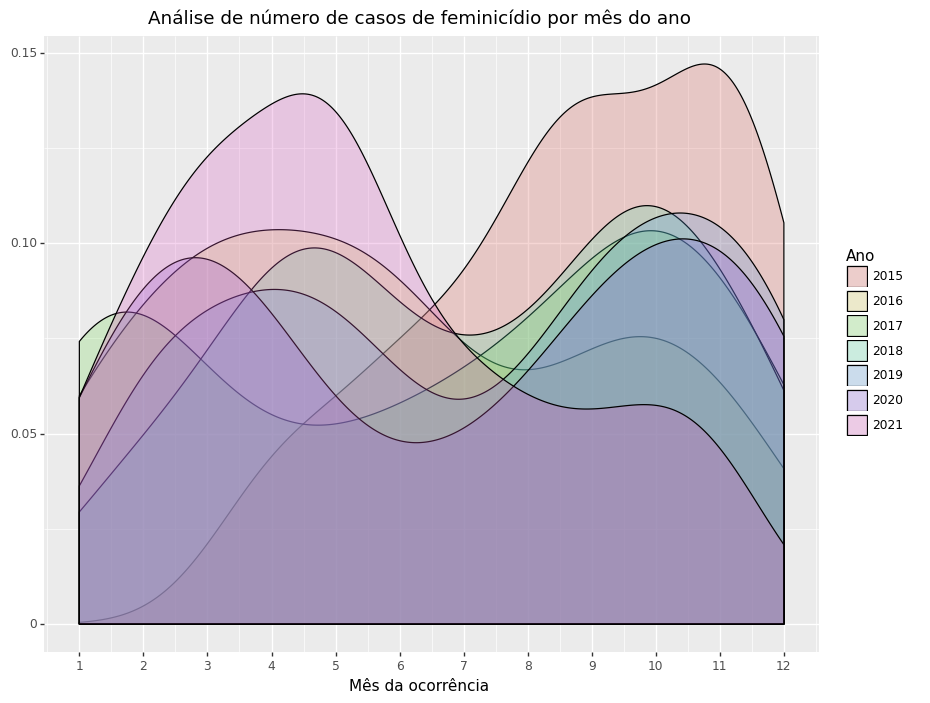

<ggplot: (8759933081969)>

In [8]:
#Mes do ano e casos de feminicídio SP

(ggplot(df, aes(x = "MES_OCORRENCIA", fill = "ANO_BO")) +
     geom_density(alpha = 0.25) +
    #scale_x_log10(labels = custom_format(("mes {:,.0f}"))) +
     labs(x = "Mês da ocorrência", y = "", fill = "Ano", title = "Análise de número de casos de feminicídio por mês do ano")+
 scale_x_continuous(breaks=range(1,13))+
      theme(figure_size = (10,8)))

Abaixo foram feitos alguns gráficos com formatted string que serão vastamente utilizados a seguir. Esta foi uma forma que encontramos de procurar deixar o código mais enxuto e com menos repetições.

In [9]:
#Gráfico de barras na ordem que vem os dados, flipped (na vertical) e com legenda.

def grafico_barras(nome_coluna: str, titulo : str):

  return(df.value_counts(f'{nome_coluna}').to_frame("n").reset_index().pipe(lambda _: ggplot(_, aes(x = f'{nome_coluna}', y = "n", fill=f'{nome_coluna}')) +
                    geom_col() +
                    labs( x = "", y = "frequência", title = f'{titulo}') +
                    coord_flip()))
  

In [10]:
#Gráfico de barras na ordem que vem os dados, sem ser flipped (ou seja, fica na horizontal) e com legenda.

def grafico_barras2(nome_coluna: str, titulo : str):

  return(df.value_counts(f'{nome_coluna}').to_frame("n").reset_index().pipe(lambda _: ggplot(_, aes(x = f'{nome_coluna}', y = "n", fill=f'{nome_coluna}')) +
                    geom_col() +
                    labs( x = "", y = "frequência", title = f'{titulo}')))

In [11]:
#Gráfico de barras na ordem que vem os dados, flipped (na vertical), sem legenda e com tamanho maior.

def grafico_barras3(nome_coluna: str, titulo : str):

  return(df.value_counts(f'{nome_coluna}').to_frame("n").reset_index().pipe(lambda _: ggplot(_, aes(x = f'{nome_coluna}', y = "n", fill=f'{nome_coluna}')) +
                    geom_col() +
                    labs( x = "", y = "frequência", title = f'{titulo}')+
                    coord_flip()+
                    theme(legend_position = "none",
                          figure_size = (15,8))))

In [12]:
#Gráfico de barras em ordem crescente, sem ser flipped(ou seja, fica na horizontal) e sem legenda.

def grafico_barras_cresc(nome_coluna, titulo):

  df_grafico_cresc = (df.value_counts(f'{nome_coluna}').to_frame("n").reset_index().sort_values("n", ascending= False))

  return(df_grafico_cresc.assign(aux = lambda _: pd.Categorical(_[f'{nome_coluna}'], categories = df_grafico_cresc[f'{nome_coluna}'])).pipe(lambda _: ggplot(_, aes(x = 'aux', y = "n", fill='aux')) +
                      geom_col() +
                      labs( x = "", y = "Quantidades", title = f'{titulo}') +
                      theme(legend_position='none',
                        figure_size = (8,5))))

In [13]:
#Gráfico de barras em ordem crescente, flipped (na vertical) e sem legenda.

def grafico_barras_cresc2(nome_coluna, titulo):

  df_grafico_cresc = (df.value_counts(f'{nome_coluna}').to_frame("n").reset_index().sort_values("n", ascending= True))

  return(df_grafico_cresc.assign(aux = lambda _: pd.Categorical(_[f'{nome_coluna}'], categories = df_grafico_cresc[f'{nome_coluna}'])).pipe(lambda _: ggplot(_, aes(x = 'aux', y = "n", fill='aux')) +
                      geom_col() +
                      labs( x = "", y = "Quantidades", title = f'{titulo}')+
                      coord_flip() +
                      theme(legend_position='none')))

In [14]:
#Gráfico de barras em ordem crescente, flipped (na vertical), sem legenda e num tamanho maior.

def grafico_barras_cresc3(nome_coluna: str, titulo : str):

  df_grafico_cresc = (df.value_counts(f'{nome_coluna}').to_frame("n").reset_index().sort_values("n", ascending= True))

  return(df_grafico_cresc.assign(aux = lambda _: pd.Categorical(_[f'{nome_coluna}'], categories = df_grafico_cresc[f'{nome_coluna}'])).pipe(lambda _: ggplot(_, aes(x = 'aux', y = "n", fill='aux')) +
                    geom_col() +
                    labs( x = "", y = "frequência", title = f'{titulo}')+
                    coord_flip()+
                    theme(legend_position = "none",
                          figure_size = (10,8))))

In [15]:
#Gráfico de barras com outra dimensão

def grafico_barras_generico(nome_coluna: str, titulo : str):

  return(df.value_counts(f'{nome_coluna}').to_frame('n').reset_index().pipe(lambda _: ggplot(_, aes(x = f'{nome_coluna}', y = 'n')) +
                    geom_col() +
                    labs( x = "", y = "frequência", title = f'{titulo}') +
                    coord_flip() +
                    theme(legend_position = "none",
                          figure_size = (10,8))))

O gráfico 2 aponta que os maiores números de Boletins de Ocorrência registrados de feminicídios no estado de São Paulo ocorreram nos anos de 2020 e de 2019, com pouco menos de 400 BO registrados. O número de registros para 2021, até o momento da análise, também segue bastante elevado. O gráfico também aponta uma tendência de crescimento no número de boletins registrados ao longo dos anos, com o menor número de BO registrados em 2015, com pouco menos de 100 registros.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


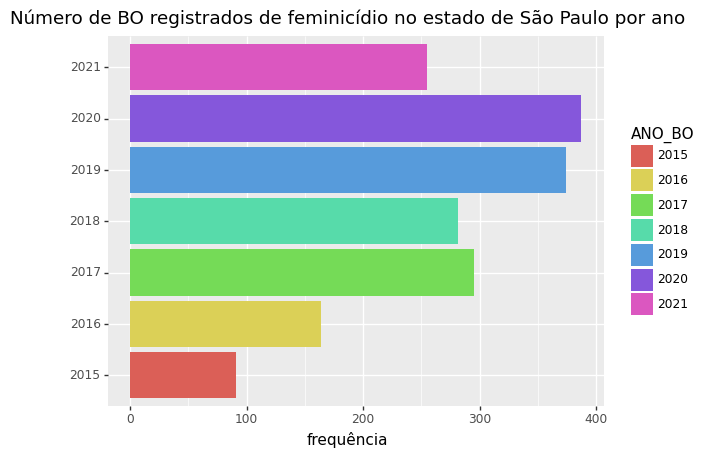

<ggplot: (8759931631045)>

In [16]:
grafico_barras("ANO_BO","Número de BO registrados de feminicídio no estado de São Paulo por ano")

Podemos observar, a partir do gráfico 3, que, no estado de São Paulo, a ocorrência de feminicídio é mais frequente nos horários da noite ou pela manhã, período em que os indivíduos estão reunidos em suas residências, local de maior ocorrência, como veremos mais para a frente na análise. O horário com menor frequência de ocorrência do crime é durante a madrugada, mesmo que ainda sejam números altos de casos.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


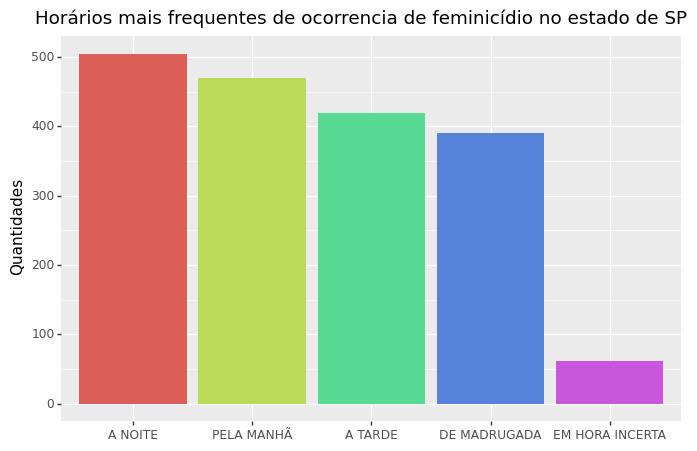

<ggplot: (8759931653253)>

In [17]:
grafico_barras_cresc("PERIDOOCORRENCIA","Horários mais frequentes de ocorrencia de feminicídio no estado de SP")


É possível ver, pelo gráfico 4, que a dispersão de feminicídios por horário varia bastante ao longo do tempo. O maior destaque está para o período da noite, que passou a ter amaior relevância nos anos mais recentes, enquanto o horário da madrugada foi relevante para 2015, mas reduziu significativamente com o tempo. Pela manhã é significativo ao longo de todo o período.


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


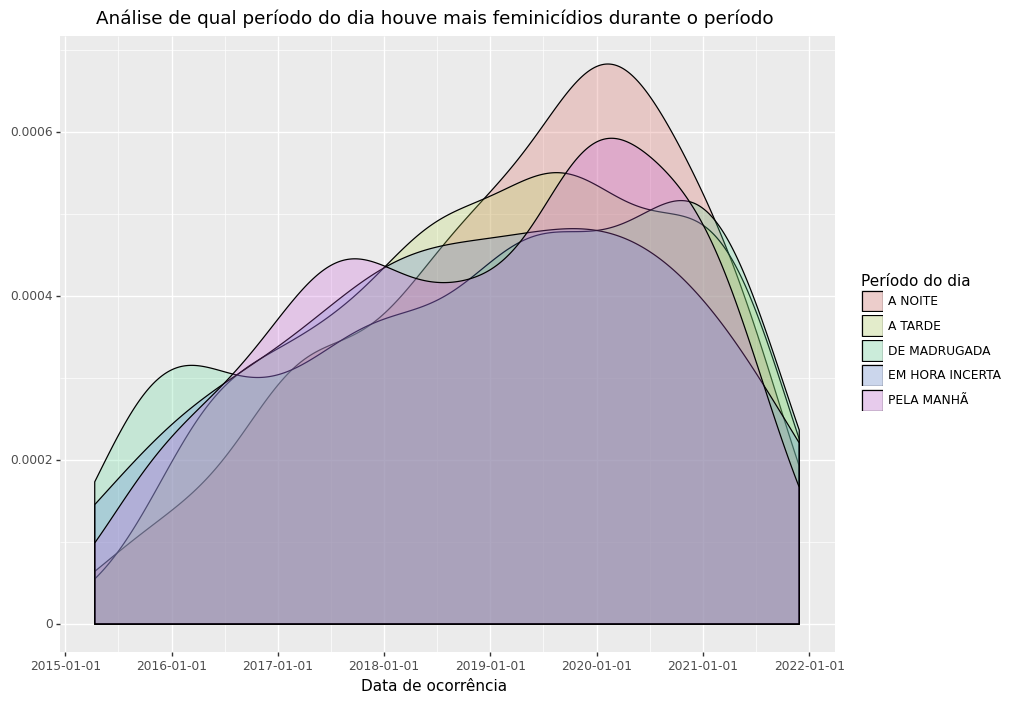

<ggplot: (8759931641617)>

In [18]:
(ggplot(df, aes(x = "DATAOCORRENCIA", fill = "PERIDOOCORRENCIA")) +
     geom_density(alpha = 0.25) +
     labs(x = "Data de ocorrência", y = "", fill = "Período do dia", title = "Análise de qual período do dia houve mais feminicídios durante o período") +
      theme(figure_size = (10,8)))

O gráfico 5 mostra que, no estado, a maioria dos casos registrados ocorreu contra mulheres brancas e que um número elevado de feminicídios foram contra mulheres pardas, com poucos casos nos quais o perfil racial da mulher não foi informado ou era outro além dos já citados. Mulheres pretas são o terceiro maior perfil racial de vítimas, mas abaixo dos anteriores.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


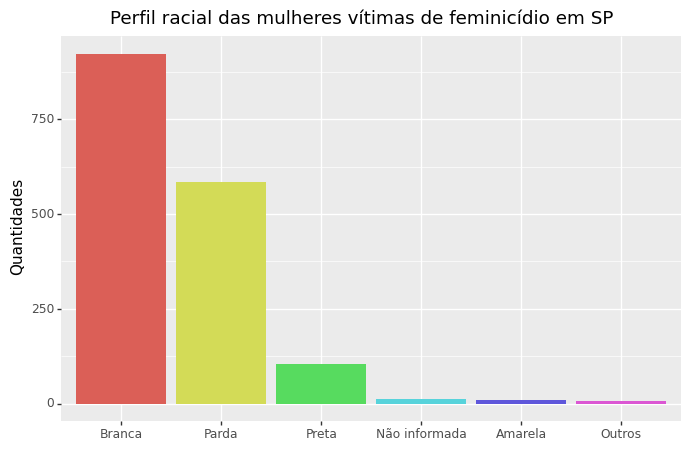

<ggplot: (8759933344785)>

In [19]:
grafico_barras_cresc("CORCUTIS","Perfil racial das mulheres vítimas de feminicídio em SP")

A seguir, vê-se que, em SP, os locais onde as mulheres são predominantemente mortas são nas residências, em primeiro lugar, e em vias públicas, em segundo lugar. As residências possuem mais que o triplo de frequência em relação às vias públicas, escancarando o problema da violência doméstica no estado.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


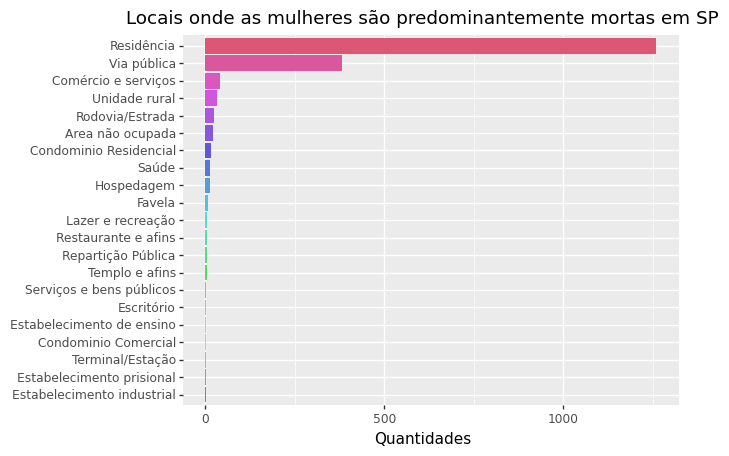

<ggplot: (8759933338733)>

In [20]:
grafico_barras_cresc2("DESCRICAOLOCAL","Locais onde as mulheres são predominantemente mortas em SP")

O perfil etário mais frequente entre as vítimas de feminicídio é de mulheres jovens, com
idade aproximada entre 25 e 35 anos. Vê-se um rápido crescimento dos casos na
adolescência e um declínio equilibrado com o passar da idade.

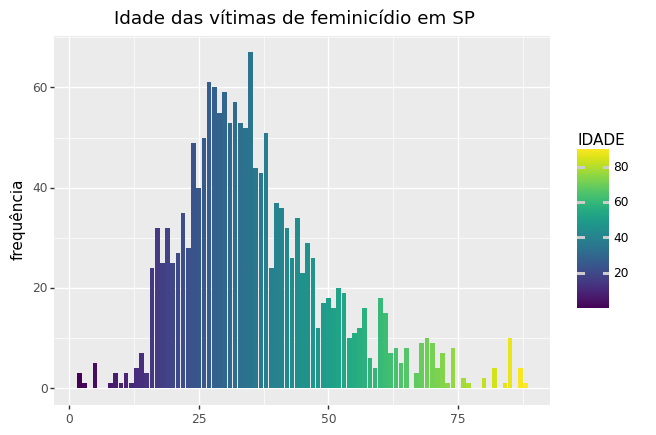

<ggplot: (8759933082009)>

In [21]:
grafico_barras2("IDADE","Idade das vítimas de feminicídio em SP")

O gráfico em boxplot demonstra que a idade média das vítimas de feminicídio em SP
não varia muito ao longo do tempo, ficando em torno dos 25 a 35 anos de idade. Em
2016 a distribuição pendeu um pouco para mulheres acima dos 30, mas em geral o
padrão tem se mantido o mesmo ao longo dos anos.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 228 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


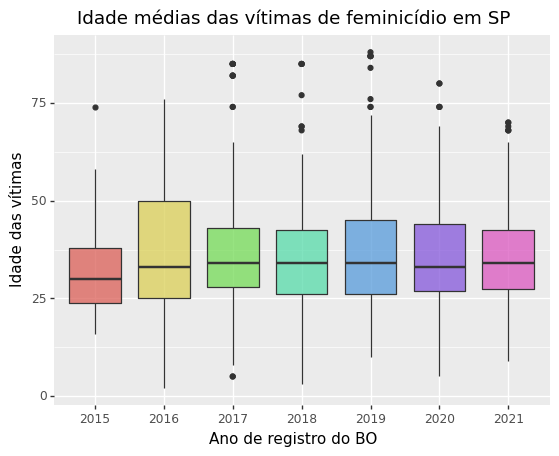

<ggplot: (8759921052145)>

In [22]:
(ggplot(df, aes(x = "ANO_BO", y = "IDADE", fill = "ANO_BO")) +
     geom_boxplot(alpha = 0.75) +
     labs(x = "Ano de registro do BO", y = "Idade das vítimas", title = "Idade médias das vítimas de feminicídio em SP") +
     theme(legend_position = "none"))

O gráfico 8 apresenta a faixa de idade das vítimas de feminicídio anualmente. A mais
frequente, para todos os anos, é entre 25 e 35 anos -mostrando a persistencia da faixa etária de vítimas nos anos descritos- tendo flutuações anuais com relação
aos valores de frequência de mulheres mais velhas. Percebe-se uma tendência de
redução dos casos de feminicídio entre mulheres mais velhas ao longo do tempo.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 228 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


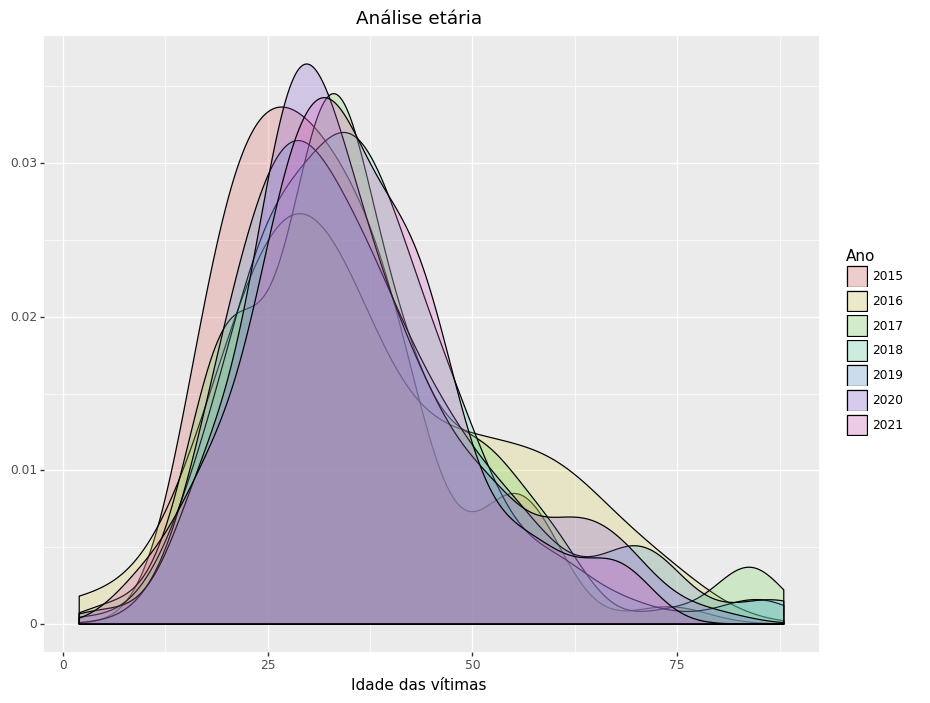

<ggplot: (8759920941221)>

In [23]:
(ggplot(df, aes(x = "IDADE", fill = "ANO_BO")) +
     geom_density(alpha = 0.25) +
     labs(x = "Idade das vítimas", y = "", fill = "Ano", title = "Análise etária") +
      theme(figure_size = (10,8)))

A frequência de crimes de feminicídio em flagrante é muito próxima da frequência de crimes não em flagrante. Indicando que grande parte das denúncias ocorrem durante o momento ou logo após o momento da ocorrência.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


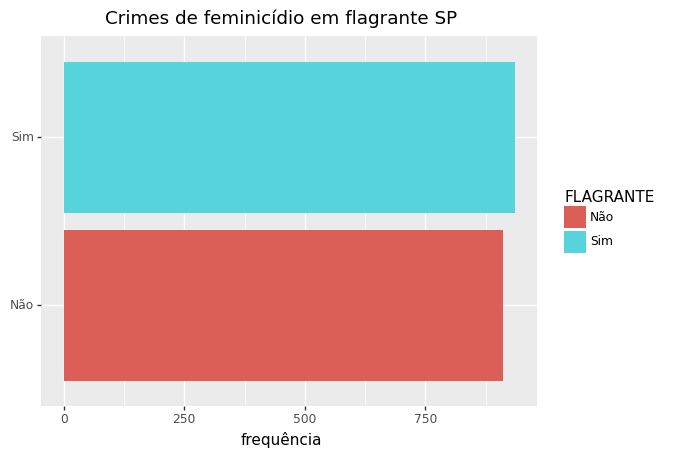

<ggplot: (8759933338441)>

In [24]:
grafico_barras('FLAGRANTE', 'Crimes de feminicídio em flagrante SP')

Em ordem decrescente, a frequência dos tipos de exame aplicados para averiguar tipificação do crime são realizados pelos: IC-IML, IML, IC, SVO. A necessidade dos laudos IC e IML tem valores notavelmente superiores, por serem procedimentos complementares, uma vez que o Instituto de Criminalística fornece provas técnicas sobre os locais, materiais, objetos, pessoas... e o Instituto Médico Legal também fornece bases técnicas para o julgamento das causas criminais, sendo a mais conhecida a necropsia. Não há passagem pelo SVO, uma vez que que feminicídios são crimes de violência, não ocorrem por falta de assistência médica ou causas naturais.


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


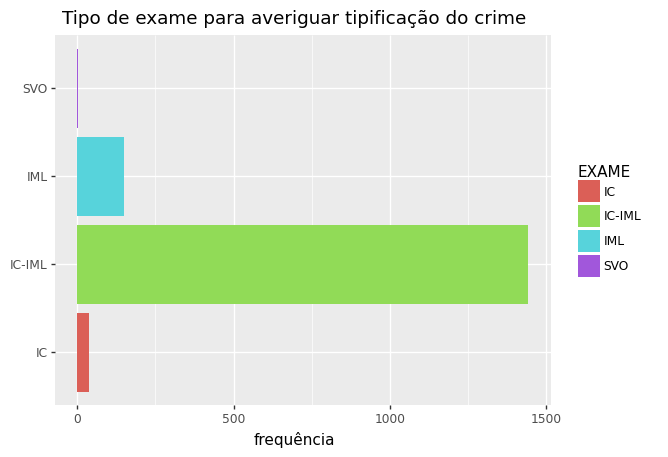

<ggplot: (8759921007913)>

In [25]:
grafico_barras("EXAME","Tipo de exame para averiguar tipificação do crime")

O gráfico 11 aponta que a data da ocorrência do crime e a data observada da denúncia são muito próximas. Comumente no mesmo dia do ocorrido, formando uma reta de 45 graus.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


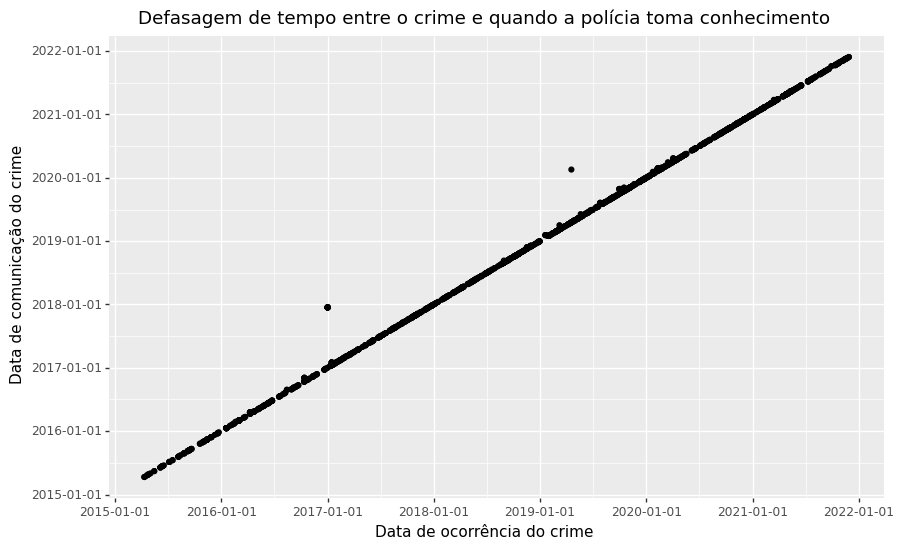

<ggplot: (8759921003921)>

In [26]:
(ggplot(df, aes(x = 'DATAOCORRENCIA', y='DATACOMUNICACAO'))+
         geom_point()+ labs(x = "Data de ocorrência do crime", y = "Data de comunicação do crime", title = "Defasagem de tempo entre o crime e quando a polícia toma conhecimento") +
          theme(legend_position = "none",
                figure_size = (10,6)))

No gráfico abaixo é possível observar que a grande maioria dos crimes de homicídio quaficiados (feminicídios) cometidos contra as mulheres são por violencia doméstica, suicídio consumado e homicídio simples, dentre outros. Em suma, a rubrica de um crime nada mais é o do que seu nome.

Para diferenciar o que é a rúbrica e a espécie do crime, segundo o direiro, em essencia rubrica é o delito cometido: homicídio, sequestro etc. Já a espécie do crime diz respeito ao bem jurídico tutelado que foi violado (vida/pessoa, patrimônio, dignidade sexual, meio ambiente etc.)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


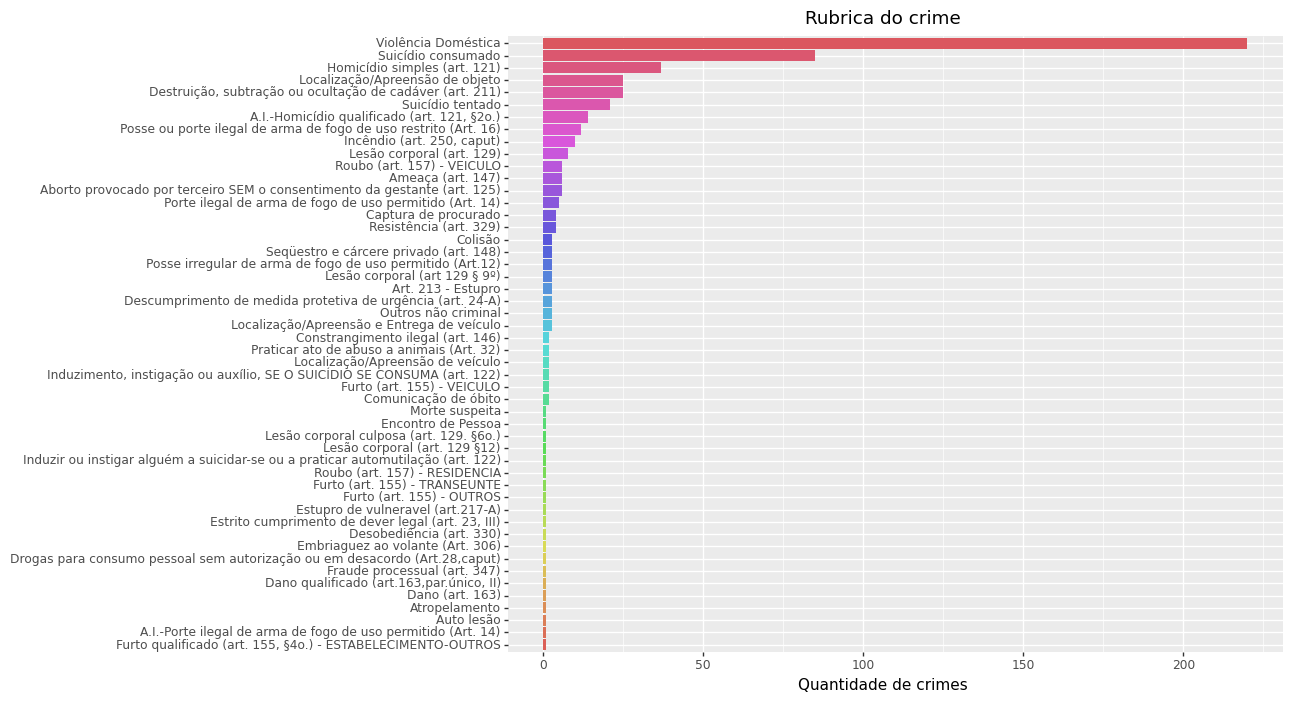

<ggplot: (8759920780849)>

In [27]:
df_grafico_cresc = (df.value_counts('RUBRICA').to_frame("n").reset_index().sort_values("n", ascending= True))

df_grafico_cresc =df_grafico_cresc[df_grafico_cresc['RUBRICA']!= 'Homicídio qualificado (art. 121, §2o.)'] 

(df_grafico_cresc.assign(aux = lambda _: pd.Categorical(_['RUBRICA'], categories = df_grafico_cresc['RUBRICA'])).pipe(lambda _: ggplot(_, aes(x = 'aux', y = "n", fill='aux')) +
                    geom_col() +
                    labs( x = "", y = "Quantidade de crimes", title = 'Rubrica do crime')+
                    coord_flip()+
                    theme(legend_position = "none",
                          figure_size = (10,8))))

Por outro lado, quando falamos de espécie do crime, nada mais é do que o tipo do crime, ou seja quele que está listado por lei. Originalmente, todos os crimes prescritos abaixo se enquadram no artigo 121 a 154 do código penal! Sendo esse o motivo pelo qual retiramos esse dado da coluna, pois de outro modo, ficaria redundante e o gráfico não dos traria a informação correta. 
Sendo assim, podemos ver abaixo que o a maioria esmagadora da tipificação do crimes de feminicídio é o de violencia doméstica, seguido por indução ao suicídio.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


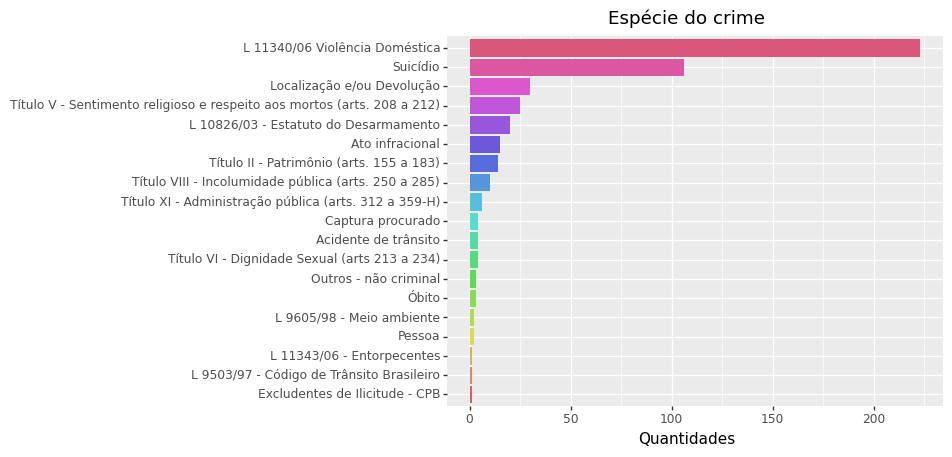

<ggplot: (8759920946593)>

In [28]:
df_grafico_cresc = (df.value_counts('ESPECIE').to_frame("n").reset_index().sort_values("n", ascending= True))

df_grafico_cresc =df_grafico_cresc[df_grafico_cresc['ESPECIE']!= 'Título I - Pessoa (arts. 121 a 154)'] #Foi preciso retirar pois todos os demais crimes são enquadrados nessa categoria

#ou seja, se não retirasse ficaria redundante

(df_grafico_cresc.assign(aux = lambda _: pd.Categorical(_['ESPECIE'], categories = df_grafico_cresc['ESPECIE'])).pipe(lambda _: ggplot(_, aes(x = 'aux', y = "n", fill='aux')) +
                      geom_col() +
                      labs( x = "", y = "Quantidades", title = 'Espécie do crime')+
                      coord_flip() +
                      theme(legend_position='none')))

O gráfico abaixo mostra os principais qualificadores do crime, ou seja, apresenta os desdobramentos, que são motivos ou ações que tornam o crime mais gravoso, aumentando assim sua pena. Os mais representativos são: 1. Por motivo fútil, ultrapassando o marco de 150; 2. traição/dissimulação, superando 100; 3. Com o uso de meios insidiosos (veneno) ou cruéis (fogo, tortura, explosivos). Em suma, o descobramento é um "qualificador" de um crime. por exemplo, se você mata alguém por um motivo torpe, fútil, ou mata alguém usando meios violentos como fogo etc, ou ainda por meio de emboscada ou traição ... essas ações “qualificam” o delito de homicídio, incidindo no aumento da pena no criminoso.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


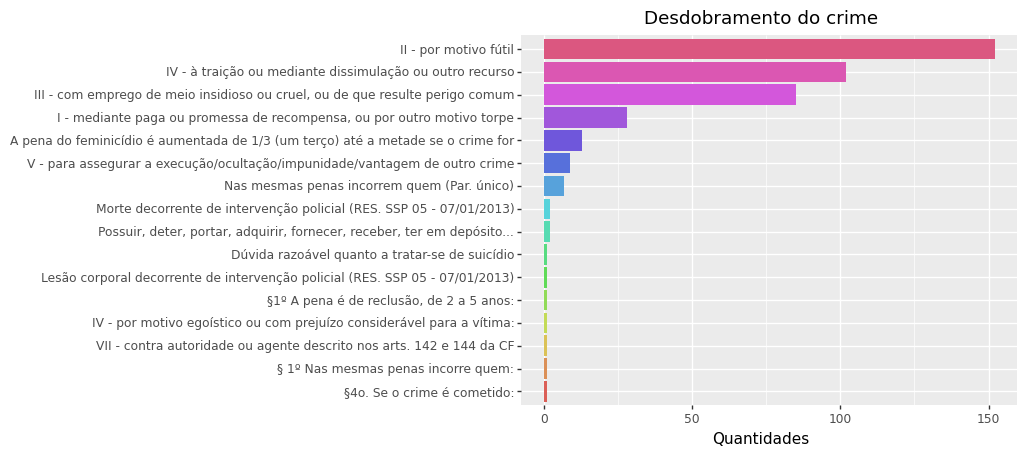

<ggplot: (8759921004189)>

In [29]:
df_grafico_cresc = (df.value_counts('DESDOBRAMENTO').to_frame("n").reset_index().sort_values("n", ascending= True))


df_grafico_cresc =df_grafico_cresc[df_grafico_cresc['DESDOBRAMENTO']!= 'VI-Feminicídio-contra a mulher por razões da condição de sexo feminino'] #Foi preciso retirar pois todos os demais crimes são enquadrados nessa categoria

#ou seja, se não retirasse ficaria redundante

(df_grafico_cresc.assign(aux = lambda _: pd.Categorical(_['DESDOBRAMENTO'], categories = df_grafico_cresc['DESDOBRAMENTO'])).pipe(lambda _: ggplot(_, aes(x = 'aux', y = "n", fill='aux')) +
                      geom_col() +
                      labs( x = "", y = "Quantidades", title = 'Desdobramento do crime')+
                      coord_flip() +
                      theme(legend_position='none')))

### A seguir: análise geoespacial! Onde estão ocorrendo os feminicídios em SP? Há localidades com maior propensão a registrar esse tipo de crime?


Tratamento das strings da nossa base.
Ele será necessário para que possamos mais a diante parear com os dados geo.

In [30]:
df['CIDADE'] = df['CIDADE'].astype(str)

df['CIDADE'] = [unidecode.unidecode(i) for i in df['CIDADE']] 

df['BAIRRO'] = df['BAIRRO'].astype(str)

df['BAIRRO'] = [unidecode.unidecode(i) for i in df['BAIRRO']] 

As cidades que começam com nome de santo precisam ser "consertadas":

Cidades que começam com "São" (ex: S.Paulo, S.Bernado do Campo, S. José dos Campos, etc.)

In [31]:
for i in range(1, len(df['CIDADE'].tolist())):
  if df['CIDADE'][i][:2] == 'S.' and i != "S.ANDRE" and i != "S.ANASTACIO" and i != "S.ROSA DE VITERBO" and i != 'S.BARBARA D OESTE' and i != 'S.RITA PASSA QUATRO' and i != 'S.FE DO SUL' and i != 'S.BRANCA' and i != 'S.GERTRUDES':
     df['CIDADE'][i] = 'SAO ' + df['CIDADE'][i][2:]

Cidades que começam com "Santo" ou "Santa":

In [32]:
for i in range(1, len(df['CIDADE'].tolist())):
  if i == "S.ANDRE" or i == "S.ANASTACIO":
    df['CIDADE'][i] = 'SANTO ' + df['CIDADE'][i][2:]
  if i == "S.ROSA DE VITERBO" or i == 'S.BARBARA D OESTE' or i == 'S.RITA PASSA QUATRO' or i == 'S.FE DO SUL' or i =='S.BRANCA' or i == 'S.GERTRUDES':
    df['CIDADE'][i] = 'SANTA ' + df['CIDADE'][i][2:]

Ajeitando o nome dos bairro de SP: (para que eles possam dar match com os nomes do geodataframe que colocaremos mais a frente)

In [33]:
for i in range(1, len(df['BAIRRO'].tolist())):
  if df['BAIRRO'][i] == 'JD SAO LUIS':
    df['BAIRRO'][i] = 'JARDIM' + df['BAIRRO'][i][2:]
    
	

Importando a biblioteca que será importante para nossa análise geo.

Abaixo o geodataframe é criado. Observação -> Para que o shapefile seja lido no colab, é preciso fazer upload de todos: do cpq, dbf, shx e não apenas do shp.

In [34]:
distritos = gpd.read_file('SIRGAS_SHP_distrito_polygon.shp')

In [35]:
distritos.head(3)

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7..."


Setando o sistema de coordenadas adequado para a análise.

In [36]:
distritos.crs = 'EPSG:31983'  #SIRGAS2000

Renomeando a coluna para Bairro para facilitar a compreensão

In [37]:
distritos = distritos.rename(columns={'ds_nome': 'Bairro'})

In [38]:
df_qtd_casos_bairros_SP_city = df.query("CIDADE =='SAO PAULO'")['BAIRRO'].value_counts().to_frame().reset_index().sort_values('BAIRRO', ascending=False).reset_index(drop=True).rename(columns={'BAIRRO': 'BairroQtd'})


Abaixo temos o dataframe de quantidade de casos por cada bairro de São Paulo em que tivemos registros de ocorrencias durante todo o período de 2015-2021.

In [39]:
df_qtd_casos_bairros_SP_city =df_qtd_casos_bairros_SP_city[df_qtd_casos_bairros_SP_city['index']!='nan']  #retirando a linha com NAN


Abaixo foi feito o merge entre esse dataframe com o número de casos e o geodataframe (dataframe que contém os dados geo).

In [40]:
df_geo_final = distritos.merge(df_qtd_casos_bairros_SP_city, how='inner', left_on='Bairro', right_on='index')

In [41]:
df_geo_final.head(3)

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,Bairro,geometry,index,BairroQtd
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7...",PIRITUBA,8
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7...",SAO DOMINGOS,2
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7...",JARAGUA,8


Aqui foram pegos os pontos centralis dos polígonos usando o método centroid do geopandas

In [42]:
df_geo_final['points'] = df_geo_final.centroid

In [43]:
df_geo_final.head(3)

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,Bairro,geometry,index,BairroQtd,points
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7...",PIRITUBA,8,POINT (323702.742 7402189.977)
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7...",SAO DOMINGOS,2,POINT (321540.376 7400777.782)
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7...",JARAGUA,8,POINT (322252.035 7406042.513)


Agora este código abaixo fará com que se repitam as linhas de acordo com a quantidade de ocorrencias existam nos bairros. É importante fazer isto, pois para fazer um mapa de kernel fidedigno precisamos que o nosso geodataframe tenha as respectivas quantidades de pontos representando os respectivos número de casos para cada bairro

Obs: só pode rodá-lo 1 vez.


In [44]:
df_geo_final=df_geo_final.loc[df_geo_final.index.repeat(df_geo_final.BairroQtd)]



In [45]:
df_geo_final.head(3)

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,Bairro,geometry,index,BairroQtd,points
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7...",PIRITUBA,8,POINT (323702.742 7402189.977)
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7...",PIRITUBA,8,POINT (323702.742 7402189.977)
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7...",PIRITUBA,8,POINT (323702.742 7402189.977)


Aqui foram pegas as latitudes e longitudes desses pontos. A matrix pontos abaixo será necessária para a realização do mapa de kernel a seguir.

In [46]:
df_geo_final["x"] = df_geo_final.centroid.x
df_geo_final["y"] = df_geo_final.centroid.y

pontos = np.vstack((df_geo_final["x"],df_geo_final["y"])).T

Importando as bibliotecas para fazer o mapa de kernel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


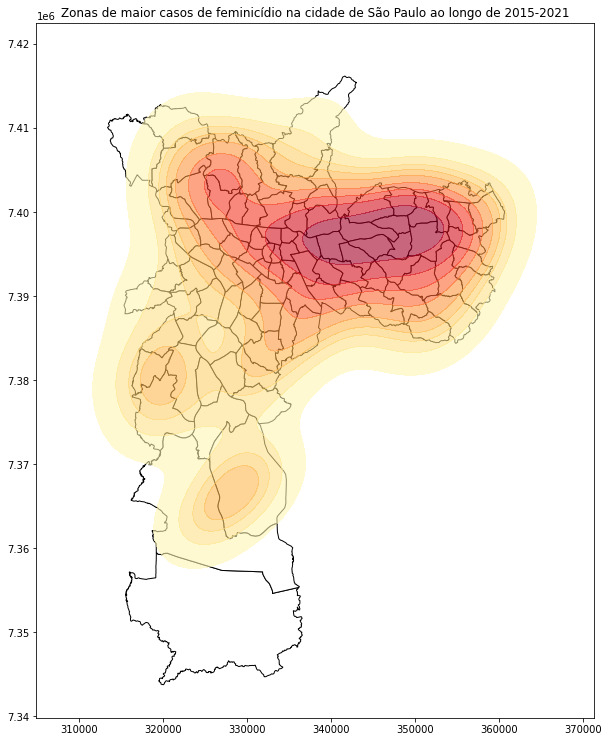

In [47]:
grafico = distritos.plot(figsize=(10,15), color='white', edgecolor='black')
grafico.set_title(f'Zonas de maior casos de feminicídio na cidade de São Paulo ao longo de 2015-2021');
sns.kdeplot(pontos[:,0], pontos[:,1], shade=True, cmap='YlOrRd', ax=grafico, alpha=0.6);

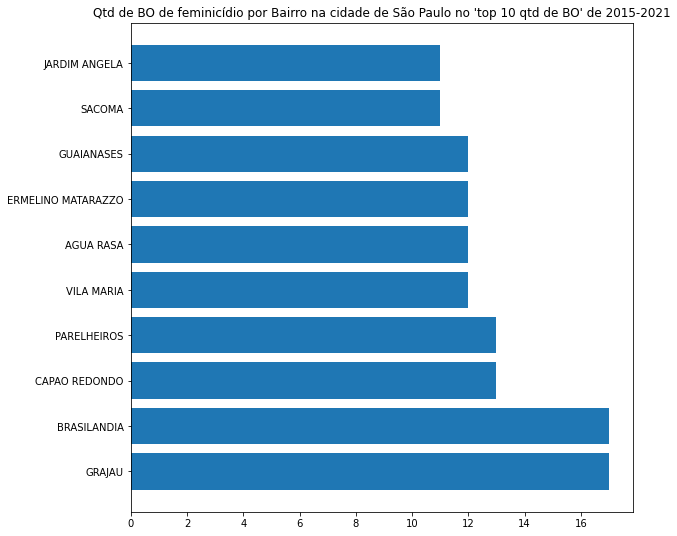

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(9,9)
ax.barh(y=df_qtd_casos_bairros_SP_city['index'].head(10), width=df_qtd_casos_bairros_SP_city['BairroQtd'].head(10));
ax.set_title("Qtd de BO de feminicídio por Bairro na cidade de São Paulo no 'top 10 qtd de BO' de 2015-2021");

In [49]:
def mapa_escolha_ano():
   ano = input("Coloque um ano de 2015 a 2021 aqui: ")
   ano = int(ano)  #função necessária para converter o tipo str para integer
   try:
    if ano <= 2021 and ano >= 2015:
      df_qtd_casos_bairros_SP_city = df.query(f"ANO_BO == '{ano}'").query("CIDADE =='SAO PAULO'")['BAIRRO'].value_counts().to_frame().reset_index().sort_values('BAIRRO', ascending=False).reset_index(drop=True).rename(columns={'BAIRRO': 'BairroQtd'})
      df_qtd_casos_bairros_SP_city =df_qtd_casos_bairros_SP_city[df_qtd_casos_bairros_SP_city['index']!='nan']  #retirando a linha com NAN
      df_geo_final = distritos.merge(df_qtd_casos_bairros_SP_city, how='inner', left_on='Bairro', right_on='index')
      df_geo_final['points'] = df_geo_final.centroid
      df_geo_final=df_geo_final.loc[df_geo_final.index.repeat(df_geo_final.BairroQtd)]
      df_geo_final["x"] = df_geo_final.centroid.x
      df_geo_final["y"] = df_geo_final.centroid.y
      pontos = np.vstack((df_geo_final["x"],df_geo_final["y"])).T
      grafico = distritos.plot(figsize=(10,15), color='white', edgecolor='black')
      grafico.set_title(f'Zonas de maior casos de feminicídio na cidade de São Paulo ao longo de {ano}');
      sns.kdeplot(pontos[:,0], pontos[:,1], shade=True, cmap='YlOrRd', ax=grafico, alpha=0.6);
      fig, ax = plt.subplots()
      fig.set_size_inches(9,9)
      ax.barh(y=df_qtd_casos_bairros_SP_city['index'].head(10), width=df_qtd_casos_bairros_SP_city['BairroQtd'].head(10));
      ax.set_title(f"Qtd de BO de feminicídio por Bairro na cidade de São Paulo no 'top 10 qtd de BO'em {ano}");
    else:
      print("Não temos dados para o ano escolhido. Escolha entre 2015-2021.")
   
   except e: 
      print(e)

Com a função abaixo é possível escolher qual ano ver os dados dos bairros e o respectivo mapa!

Coloque um ano de 2015 a 2021 aqui: 2015


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


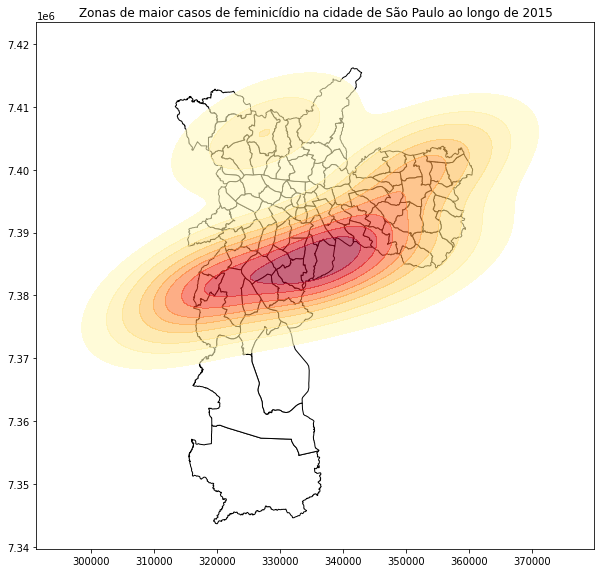

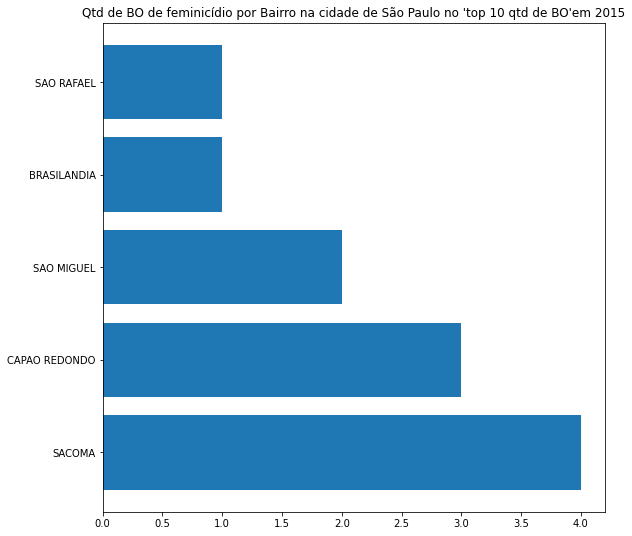

In [50]:
mapa_escolha_ano()

#Modelos preditivos

Aqui deseja-se tentar prever quantos feminicicídios ocorrerão nos próximos dias.

Para isto, é preciso agrupar os dados de quantidades de feminicídios por dia. Ademais, como algumas variáveis categóricas serão usadas no modelo preditivo, será utilizada a "moda" de cada variável deste tipo como a categoria representativa daquele dia.

Por exemplo: será usada a raça das vítimas na análise. Sendo assim, será visto o tipo racial preedominante das vitimas de cada dia para representar o "tipo" racial das N vítimas do dia em questão, não significando assim que não houve ocorrências de feminicídio relacionado com outras raças.

Abaixo temos o dataframe com a moda do turno do dia em que ocorreram os crimes no dia e a moda da raça dos casos das respectivas datas.

In [51]:
df_moda_ocorr_por_data =(df.filter(['DATAOCORRENCIA','PERIDOOCORRENCIA', 'CORCUTIS','IDADE','FLAGRANTE']).groupby('DATAOCORRENCIA',as_index=False).apply(pd.DataFrame.mode)).reset_index(drop=True)

Abaixo temos o dataframe com as quantidades de crimes por data.

In [52]:
df_ocorr_por_data = df['DATAOCORRENCIA'].value_counts().to_frame().reset_index().rename(columns={'DATAOCORRENCIA':'N_OCORRENCIAS', 'index':'DATAOCORRENCIA'})

df_ocorr_por_data['MES'] = df_ocorr_por_data['DATAOCORRENCIA'].dt.month.astype('str')

df_ocorr_por_data['ANO'] = df_ocorr_por_data['DATAOCORRENCIA'].dt.year.astype('str')

Aqui os 2 dataframes - o da moda e o da quantidade de crimes- foram unidos.

In [53]:
df_ocorr_por_data_global = pd.merge(df_moda_ocorr_por_data, df_ocorr_por_data, on= "DATAOCORRENCIA")

In [54]:
df_ocorr_por_data_global.head(3)

,DATAOCORRENCIA,PERIDOOCORRENCIA,CORCUTIS,IDADE,FLAGRANTE,N_OCORRENCIAS,MES,ANO
0,2015-04-12,PELA MANHÃ,Branca,44.0,Não,2,4,2015
1,2015-04-18,A TARDE,Parda,37.0,Não,1,4,2015
2,2015-04-24,A NOITE,Branca,17.0,Não,3,4,2015


Aqui é garantido que o tipo dos dados permita fazer o gráfico de quantidade de feminicídios registrados por mes em SP.

In [55]:
df_ocorr_por_data['ANO']=df_ocorr_por_data['ANO'].astype('str')

df_ocorr_por_data['MES']=df_ocorr_por_data['MES'].astype('int')


Em 2015, pela ausência de informação para os primeiros três meses, teve seu pior mês
em novembro, ao contrário de 2016, com maior incidência de caso no início do ano, nos
meses de janeiro e março, 2017 teve um pico de casos substancial em outubro, mês de
maior ocorrência também para 2018, apesar de em 2018 e 2019 a distribuição ao longo 
dos meses ser mais equilibrada. Em 2020 a maior parte dos casos ocorreu nos últimos
três meses do ano, com o ápice da pandemia, presente também nos altos índices para
o início de 2021.


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


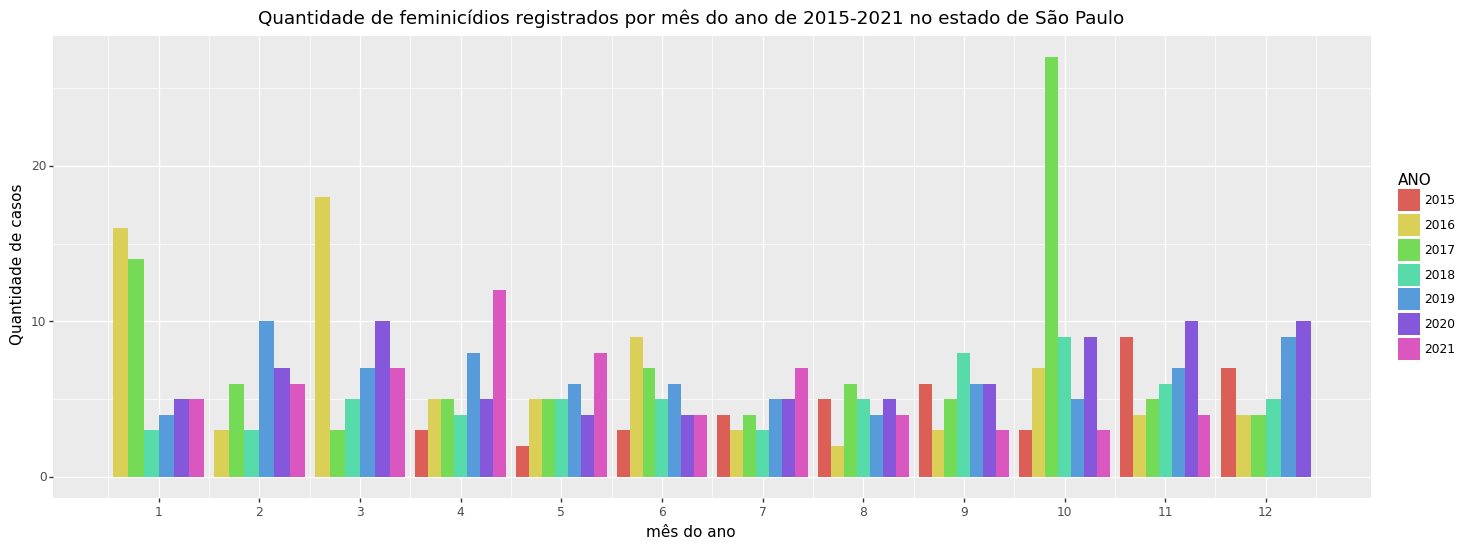

<ggplot: (8759933200549)>

In [56]:
(ggplot(df_ocorr_por_data, aes(x='MES',y='N_OCORRENCIAS', fill='ANO')) +
        geom_col(stat='identity', position='dodge') +
        labs( x = "mês do ano", y = "Quantidade de casos", title = 'Quantidade de feminicídios registrados por mês do ano de 2015-2021 no estado de São Paulo') +
        scale_x_continuous(breaks=range(1,13))+
        theme(figure_size = (17,6))) 

O gráfico a seguir mostra a quantidade de casos de feminicídio no estado de São Paulo
de 2015 a 2021 divido pelos meses do ano – foi elaborado para tentar observar alguma
sazonalidade nos casos de feminicídio ao longo do ano. Não é possível concluir que há
uma sazonalidade nesse evento, pois a distribuição não parece segue um padrão ao longo
dos meses durante o ano.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


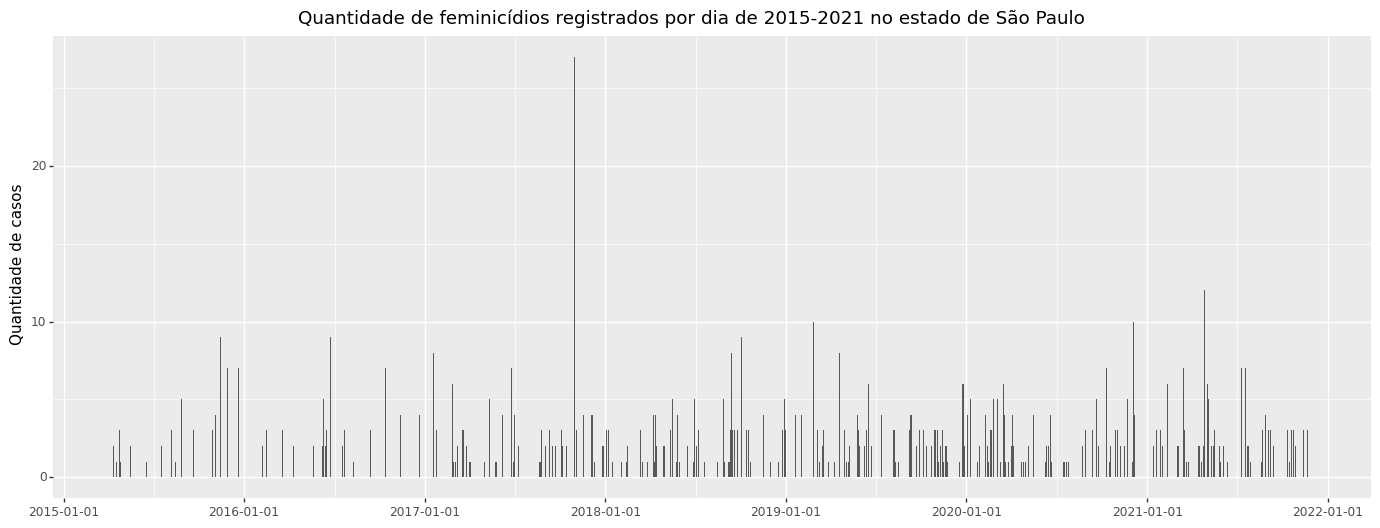

<ggplot: (8759921085977)>

In [57]:
(df.value_counts('DATAOCORRENCIA').to_frame("n").reset_index().pipe(lambda _: ggplot(_, aes(x = 'DATAOCORRENCIA', y = "n")) +
                    geom_col() +
                    labs( x = "", y = "Quantidade de casos", title = 'Quantidade de feminicídios registrados por dia de 2015-2021 no estado de São Paulo') +
                    theme(legend_position = "none",
                          figure_size = (17,6))))

#Regressão Linear Múltipla

A regressão linear múltipla foi calculada a partir da biblioteca Scikit-Learn, para machine
learn, e através da técnica de Mínimos Quadrados Ordinários (OLS).
O modelo de regressão tem como objetivo a previsão do número de ocorrências de
crimes de feminicídio nos próximos dias (variável resposta), enquanto as variáveis
independentes do modelo são: 1. Meses (de 1 a 12); 2. Raça (preta, parda, outros, não
informada, branca e amarela); 3. Se foi flagrante ou não. 

In [58]:
df_ocorr_por_data_global = df_ocorr_por_data_global.assign(CORCUTIS = lambda _: pd.Categorical(_.CORCUTIS, ["Preta", "Parda", "Outros", "Não informada", "Branca", "Amarela"]),
                 MES = lambda _: pd.Categorical(_.MES, ['1','2','3','4','5','6','7','8','9','10','11','12']),
                 FLAGRANTE = lambda _: pd.Categorical(_.FLAGRANTE, ['Sim','Não']))

In [59]:
df_ocorr_por_data_global= df_ocorr_por_data_global.dropna()

In [60]:
lin_reg = smf.ols("N_OCORRENCIAS ~ MES + CORCUTIS + PERIDOOCORRENCIA + FLAGRANTE", df_ocorr_por_data_global).fit()

In [61]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          N_OCORRENCIAS   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.381
Date:                Sun, 23 Jan 2022   Prob (F-statistic):              0.120
Time:                        23:56:51   Log-Likelihood:                -1350.4
No. Observations:                 609   AIC:                             2745.
Df Residuals:                     587   BIC:                             2842.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               3.4831      0.613      5.683      0.000       2.279       4.687
MES[T.2]                               -0.8148      0.528     -1.543      0.123      -1.852       0.223
MES[T.3]                               -0.7399      0.518     -1.427      0.154      -1.758       0.278
MES[T.4]                               -0.9972      0.511     -1.950      0.052      -2.001       0.007
MES[T.5]                               -0.8856      0.512     -1.730      0.084      -1.891       0.120
MES[T.6]                               -1.0997      0.543     -2.027      0.043      -2.165      -0.034
MES[T.7]                               -1.2497      0.553     -2.260      0.024      -2.336      -0.164
MES[T.8]                               -1.5592      0.523     -2.982      0.003      -2.586      -0.532
MES[T.9]                               -0.9054      0.516     -1.755      0.080      -1.919       0.108
MES[T.10]                              -0.2405      0.511     -0.470      0.638      -1.245       0.764
MES[T.11]                              -0.8470      0.514     -1.648      0.100      -1.857       0.163
MES[T.12]                              -0.8632      0.514     -1.678      0.094      -1.873       0.147
CORCUTIS[T.Parda]                       0.1307      0.430      0.304      0.761      -0.713       0.975
CORCUTIS[T.Outros]                     -0.4743      2.324     -0.204      0.838      -5.038       4.090
CORCUTIS[T.Não informada]              -0.9362      0.955     -0.981      0.327      -2.811       0.939
CORCUTIS[T.Branca]                      0.4486      0.417      1.077      0.282      -0.370       1.267
CORCUTIS[T.Amarela]                    -0.5747      1.680     -0.342      0.732      -3.873       2.724
PERIDOOCORRENCIA[T.A TARDE]             0.1740      0.254      0.686      0.493      -0.324       0.672
PERIDOOCORRENCIA[T.DE MADRUGADA]        0.3168      0.268      1.180      0.238      -0.210       0.844
PERIDOOCORRENCIA[T.EM HORA INCERTA]     0.6775      0.540      1.255      0.210      -0.382       1.737
PERIDOOCORRENCIA[T.PELA MANHÃ]          0.3524      0.259      1.361      0.174      -0.156       0.861
FLAGRANTE[T.Não]                       -0.3358      0.187     -1.794      0.073      -0.703       0.032
==============================================================================
Omnibus:                      505.067   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16337.556
Skew:                           3.442   Prob(JB):                         0.00
Kurtosis:                      27.422   Cond. No.                         36.2
==============================================================================

Warnings

O intercepto da equação representa o valor esperado da variável resposta, no caso
número de ocorrências, quando x for zero, enquanto os demais coeficientes representam
a variação esperada em y quando a variável independente em questão aumenta em 1
unidade, aplicando o conceito ceteris paribus.
Entretanto, ao analisar o R² do modelo concluímos que não é estatisticamente válido,
uma vez que somente 4.7% da variabilidade de y é explicada pelas variáveis
independentes.
Além dessa métrica, foi analisado o P-valor de cada uma das variáveis (nível de
significância de 5%): como a maioria dos p-valores foram altos, isso indica que a hipótese nula, de que o coeficiente seja igual a zero,
não deve ser rejeitada.



In [62]:
training, test = train_test_split(df_ocorr_por_data_global, test_size = 0.5, random_state = 42)

lin_reg = smf.ols("N_OCORRENCIAS ~ MES + CORCUTIS + PERIDOOCORRENCIA + FLAGRANTE", training).fit()

print("R^2 = ", lin_reg.rsquared)

y_hat = lin_reg.predict(test)

RMSE = np.sqrt(mean_squared_error(np.exp(y_hat), test.N_OCORRENCIAS))

np.round(RMSE, 2)

R^2 =  0.06618449285007688


30.55

Fazendo a média da diferença ao quadrado dos valores observados em relação aos
valores estimados pelo modelo, tem-se o EQM (erro quadrático médio) que indica a
acurácia das previsões.
Utilizando todas as variáveis propostas e mantendo a forma funcional lin-lin, com a
divisão de 50% dos dados para teste e os outros 50% para construção do modelo (treino)
de forma aleatória, foi calculado o erro quadrático médio de 30.55 dias, uma vez que
quanto mais próximo ao zero essa medida, melhor a assertividade dos dados calculados.

#Árvore de regressão

In [63]:
y, X = patsy.dmatrices("N_OCORRENCIAS ~ MES + CORCUTIS + FLAGRANTE", data = df_ocorr_por_data_global)

In [64]:
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size = 0.5, random_state = 42)

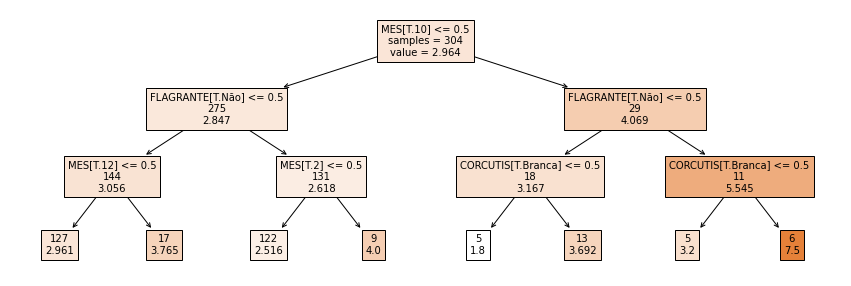

In [65]:
rtree = tree.DecisionTreeRegressor(max_depth = 3).fit(X_trn, y_trn)

plt.figure(figsize = (15, 5))
tree.plot_tree(rtree,
               feature_names = X.design_info.column_names,
               label = "root",
               filled = True,
               impurity = False, 
               fontsize = 10);

In [66]:
y_hat_tree = rtree.predict(X_tst)

RMSE = np.sqrt(mean_squared_error(y_tst, y_hat_tree))

print(np.round(RMSE, 2))

2.38


Com base na divisão aleatória dos dados em conjunto de treino e teste, e utilizando x e
y de treinamento para a montagem da árvore de regressão com profundidade 3,
chegamos em algumas possibilidades de valores para a variável resposta, número de
ocorrências nos próximos dias.
O erro quadrático médio desse modelo preditivo é de 2.38 dias.


#Random Forest

In [67]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

rf.fit(X_trn, np.ravel(y_trn))

RandomForestRegressor(n_estimators=500, random_state=42)

In [68]:
y_hat_rf = rf.predict(X_tst)

RMSE = np.sqrt(mean_squared_error(y_tst, y_hat_rf))

np.round(RMSE, 2)

2.42

Diferentemente dos demais modelos preditivos, na árvore aleatória é realizado um
sorteio de algumas variáveis para que sejam feitos os testes através da técnica de
bagging (utilização de um modelo várias vezes para que seja feita uma média), com isso
espera-se uma melhora na precisão do modelo. Com esse método atingiu-se um erro
quadrático médio de 2.42 dias, significantemente menor do que o calculado pelo modelo
de regressão, mas ligeiramente maior que a modelagem pela árvore de regressão.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


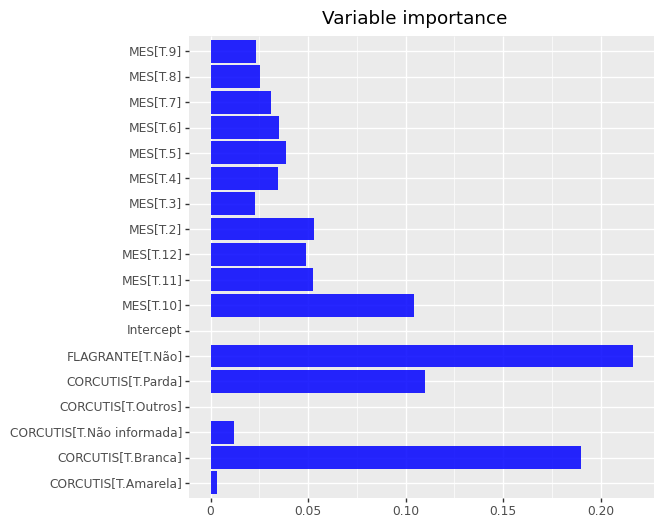

<ggplot: (8759920676065)>

In [69]:
(pd.DataFrame(dict(variable = X.design_info.column_names, importance = rf.feature_importances_))
                      .pipe(lambda _: ggplot(_, aes(x = "variable" , y = "importance")) +
                       geom_col(alpha = 0.85, fill = "blue") +
                       labs(x = "", y = "", title = "Variable importance") +
                       coord_flip() +
                       theme(legend_position = "none", figure_size = (6, 6))))

Acima, é possível ver quais foram as features mais importantes para prever a quantidade de casos segundo o modelo de Random Forest. A principal é quando o crime ocorre em flagrante, seguido pela raça autodeclarada como branca e em terceiro pela raça autodeclarada como parda. Por sua vez, a quarta foi o mês 10. Contudo, talvez isso possa ser explicado pelo fato de que em outubro de 2018 houve um número acentuado de casos, aproximando-se assim de um outlier.
